In [3]:
## keras and tensorflow

1. we collect the data stock data - Applce Inc. --- DONE
2. Preprocess the data - Train and Test --- 
3. Create An Stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output

In [1]:
import pandas_datareader as pdr

In [2]:
import pandas as pd
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df1 = df.reset_index()['close']

In [5]:
df1.shape

(1258,)

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

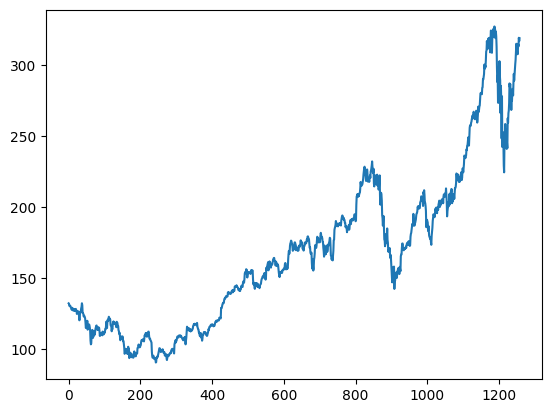

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax(0-1) scaler 

In [9]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [10]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [13]:
df1.shape

(1258, 1)

For the linear regression mode and classfication model using the CROSS VALIDATION and random seed are good.
However for time series data divide the data based on time

In [14]:
##splitting dataset into train and test spplit
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [15]:
training_size,test_size

(817, 441)

In [18]:
training_size

817

In [21]:
test_size

441

In [16]:
print(train_data)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 [0.1696994 ]
 [0.16727181]
 [0.16794731]
 [0.16473866]
 [0.16174111]
 [0.1581525 ]
 [0.15654817]
 [0.16271215]
 [0.1614878 ]
 [0.1554927 ]
 [0.15443722]
 [0.15730811]
 [0.15604154]
 [0.15849025]
 [0.15308621]
 [0.15735033]
 [0.15490163]
 [0.15946129]
 [0.15688592]
 [0.1537195 ]
 [0.14434687]
 [0.14812547]
 [0.15308621]
 [0.15241071]
 [0.15055307]
 [0.14924428]
 [0.13607194]
 [0.12551718]
 [0.13906949]
 [0.14911762]
 [0.14890653]
 [0.15401503]
 [0.16115005]
 [0.16583636]
 [0.17618002]
 [0.17060711]
 [0.14725998]
 [0.14700667]
 [0.14422021]
 [0.13691632]
 [0.13949168]
 [0.13784514]
 [0.13522756]
 [0.13071012]
 [0.11863548]
 [0.10259225]
 [0.1058009 ]
 [0.10466098]
 [0.10630752]
 [0.12403952]
 [0.09773706]
 [0.10512539]
 [0.10474542]
 [0.10816516]
 [0.11323144]
 [0.11044499]
 [0.10415435]
 [0.09419066]
 [0.06510175]
 [0.05395592]
 [0.0565735 ]
 [0.08169383]
 [0.09533058]
 [0.09689268]
 [0.09465507]
 [0.07337668]
 [0.09288187]
 [0.08456472]
 [0.07

In [17]:
print(test_data)

[[0.52651355]
 [0.52837119]
 [0.53119986]
 [0.53871485]
 [0.5461454 ]
 [0.55999324]
 [0.56864815]
 [0.57962509]
 [0.58270708]
 [0.57641645]
 [0.56049987]
 [0.55290045]
 [0.54036139]
 [0.5636663 ]
 [0.55192941]
 [0.57447437]
 [0.56362408]
 [0.53846154]
 [0.53998142]
 [0.54053027]
 [0.54753863]
 [0.53753272]
 [0.55074728]
 [0.55665794]
 [0.54918517]
 [0.56831039]
 [0.5716457 ]
 [0.57806299]
 [0.58659124]
 [0.59837035]
 [0.58114498]
 [0.56552394]
 [0.56332855]
 [0.57641645]
 [0.53204425]
 [0.52398041]
 [0.55632019]
 [0.53626615]
 [0.55648907]
 [0.55243604]
 [0.5306088 ]
 [0.54449886]
 [0.55015621]
 [0.55893777]
 [0.52668243]
 [0.54656759]
 [0.53179093]
 [0.51465   ]
 [0.51912522]
 [0.542599  ]
 [0.5567846 ]
 [0.49455374]
 [0.46968673]
 [0.47889048]
 [0.50498185]
 [0.49881787]
 [0.48184582]
 [0.43836021]
 [0.43016972]
 [0.40724479]
 [0.42670776]
 [0.43565819]
 [0.4032762 ]
 [0.3657857 ]
 [0.36494132]
 [0.34598497]
 [0.355822  ]
 [0.35421768]
 [0.38250443]
 [0.37663599]
 [0.37254074]
 [0.39

In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [24]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [25]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test =  np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [30]:
X_train[0].shape

(100, 1)

In [31]:
! pip install tensorflow


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
### create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 324ms/step - loss: 0.0241 - val_loss: 0.0635
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 0.0039 - val_loss: 0.0058
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 9.3713e-04 - val_loss: 0.0055
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - loss: 0.0010 - val_loss: 0.0045
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 7.4310e-04 - val_loss: 0.0061
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 6.1132e-04 - val_loss: 0.0052
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 6.2172e-04 - val_loss: 0.0052
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 6.1193e-04 - val_loss: 0.0049
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - loss: 6.0277e-04 - val_loss: 0.0044
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - loss: 5.9672e-04 - val_loss: 0.0041
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 5.9271e-04 - val_loss: 0.0052
Epoch 12

In [38]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [39]:
##Transform back to origin form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [41]:
##Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

140.7170938497269

In [42]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

238.64645601433796

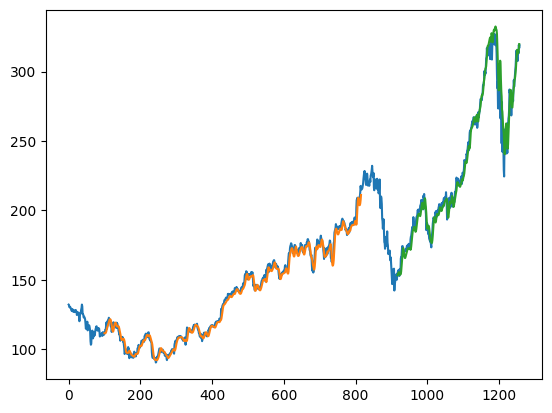

In [43]:
### Plotting
# shift train predictions for plotting

look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

441

In [45]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
x_input = test_data[341:].reshape(1,-1)

In [47]:
x_input.shape

(1, 100)

In [48]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [49]:
#demonstrate prediction for next 10 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.9874998]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [50]:
day_new = np.arange(1,101)
day_pred=np.arange(101,131)

In [51]:
import matplotlib.pyplot as plt

In [52]:
len(df1)

1258

In [53]:
df3 = df1.tolist()
df3.extend(lst_output)

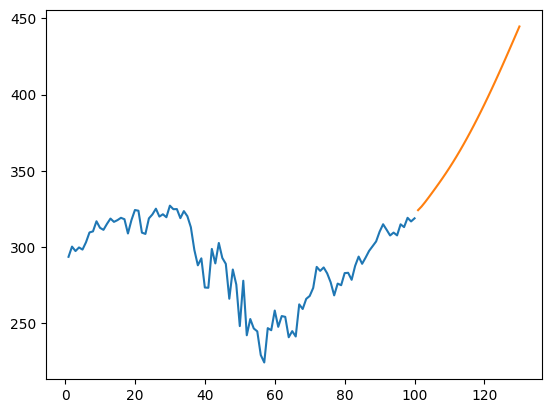

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

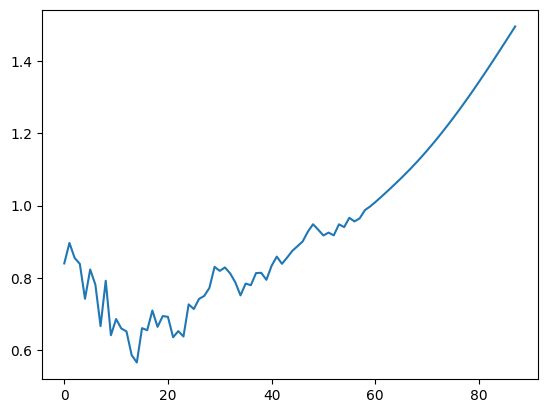

In [56]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])